In [19]:
#import libary for use method
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [20]:
bank = pd.read_csv('loan_prediction.csv')
bank


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [21]:
#Lets Understand the Columns Values
info = ["Unique Loan ID","\tMale / Female","Applicant married (Y/N)","Number of dependents (0, 1, 2, 3+)","Applicant Education (Graduate / Under Graduate)","Self employed (Y/N)","\bApplicant income","\bCoapplicant income","Loan amount in thousands","\bTerm of loan in months","credit history meets guidelines (0, 1)","Urban / Semi Urban / Rural","Loan approved (Y/N)"]



for i in range(len(info)):
    print(bank.columns[i]+":\t\t\t"+info[i])

Loan_ID:			Unique Loan ID
Gender:				Male / Female
Married:			Applicant married (Y/N)
Dependents:			Number of dependents (0, 1, 2, 3+)
Education:			Applicant Education (Graduate / Under Graduate)
Self_Employed:			Self employed (Y/N)
ApplicantIncome:			Applicant income
CoapplicantIncome:			Coapplicant income
LoanAmount:			Loan amount in thousands
Loan_Amount_Term:			Term of loan in months
Credit_History:			credit history meets guidelines (0, 1)
Property_Area:			Urban / Semi Urban / Rural
Loan_Status:			Loan approved (Y/N)


In [22]:
bank.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [23]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [24]:
bank.shape

(614, 13)

In [25]:
print(bank.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [26]:
bank['Gender'].fillna(bank['Gender'].mode()[0], inplace=True)
bank['Married'].fillna(bank['Married'].mode()[0], inplace=True)
bank['Dependents'].fillna(bank['Dependents'].mode()[0], inplace=True)
bank['Self_Employed'].fillna(bank['Self_Employed'].mode()[0], inplace=True)

mean_LoanAmount=bank['LoanAmount'].mean()
LoanAmount=float(mean_LoanAmount)
bank['LoanAmount'].fillna(LoanAmount,inplace=True)

mean_Loan_Amount_Term=bank['Loan_Amount_Term'].mean()
Loan_Amount_Term=float(mean_Loan_Amount_Term)
bank['Loan_Amount_Term'].fillna(Loan_Amount_Term,inplace=True)

mean_Credit_History=bank['Credit_History'].mean()
Credit_History=float(mean_Credit_History)
bank['Credit_History'].fillna(Credit_History,inplace=True)


In [27]:
print(bank.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [28]:
bank.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [29]:
# Correlation Plot
corrmat = bank.corr()
corrmat


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


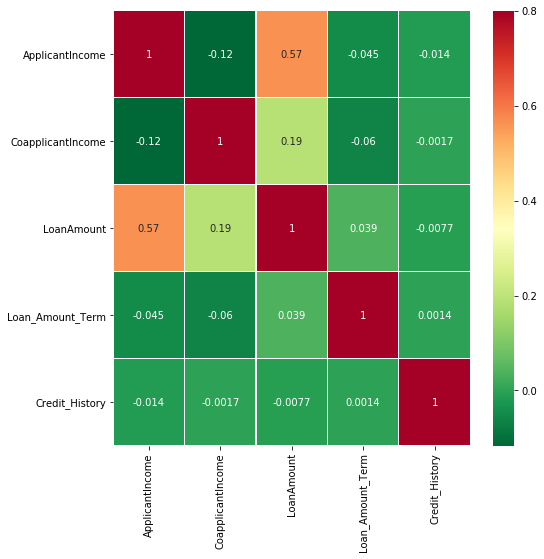

In [30]:
# Correlation Plot
corrmat = bank.corr()

#Set uo the matplolib figure
f, ax = plt.subplots(figsize=(8,8))

#Draw the heatmap using seaborn
colormap = plt.cm.RdYlGn_r
sns.heatmap(corrmat, linewidths=0.1, cmap = colormap, linecolor = 'White', vmax=0.8, annot=True)

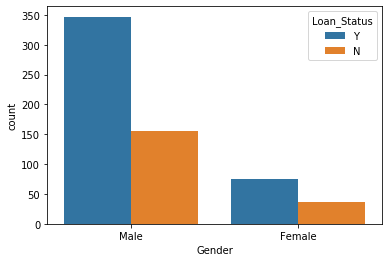

In [31]:
sns.countplot(x='Gender',data=bank,hue='Loan_Status')

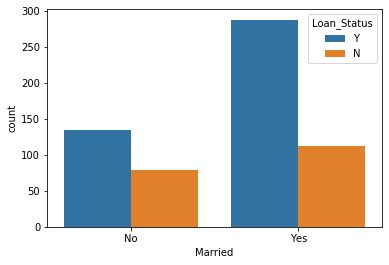

In [32]:
sns.countplot(x='Married',data=bank,hue='Loan_Status')

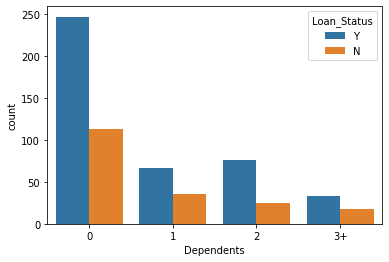

In [33]:
sns.countplot(x='Dependents',data=bank,hue='Loan_Status')

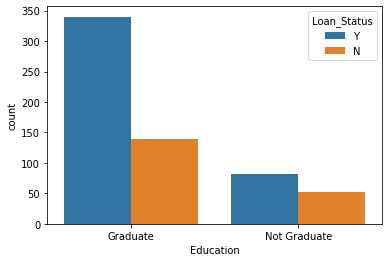

In [34]:
sns.countplot(x='Education',data=bank,hue='Loan_Status')

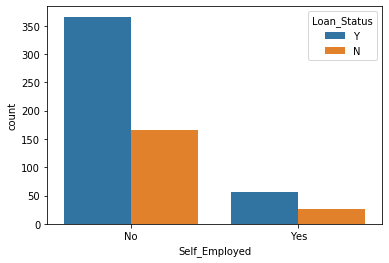

In [35]:
sns.countplot(x='Self_Employed',data=bank,hue='Loan_Status')

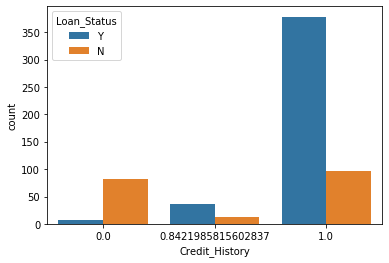

In [36]:
sns.countplot(x='Credit_History',data=bank,hue='Loan_Status')

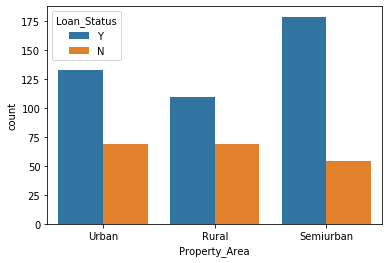

In [37]:
sns.countplot(x='Property_Area',data=bank,hue='Loan_Status')

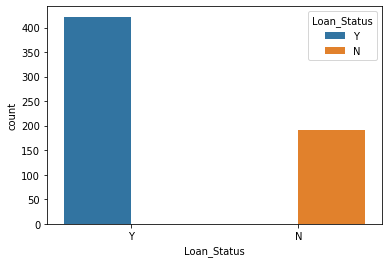

In [38]:
sns.countplot(x='Loan_Status',data=bank,hue='Loan_Status')

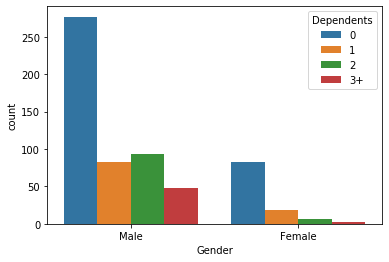

In [39]:
sns.countplot(x='Gender',data=bank,hue='Dependents')

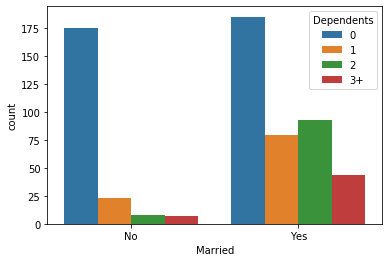

In [40]:
sns.countplot(x='Married',data=bank,hue='Dependents')

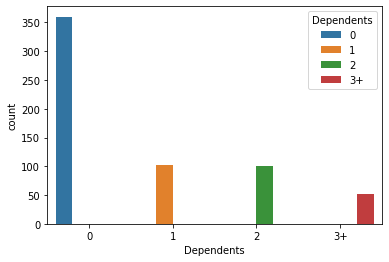

In [41]:
sns.countplot(x='Dependents',data=bank,hue='Dependents')

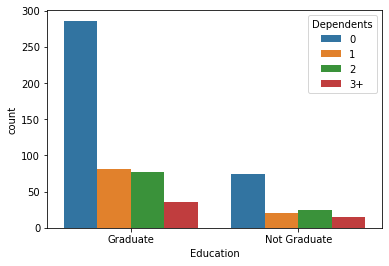

In [42]:
sns.countplot(x='Education',data=bank,hue='Dependents')

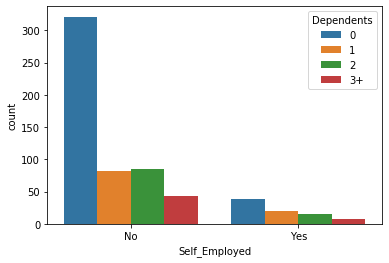

In [43]:
sns.countplot(x='Self_Employed',data=bank,hue='Dependents')

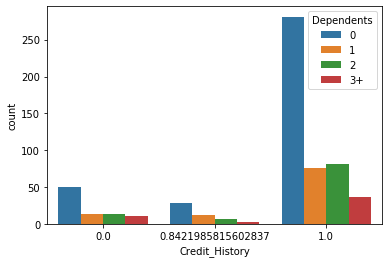

In [44]:
sns.countplot(x='Credit_History',data=bank,hue='Dependents')

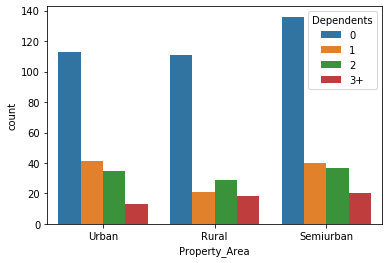

In [45]:
sns.countplot(x='Property_Area',data=bank,hue='Dependents')

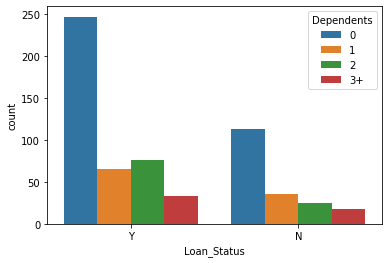

In [46]:
sns.countplot(x='Loan_Status',data=bank,hue='Dependents')

In [47]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()
bank['Loan_Status'] = le.fit_transform(bank['Loan_Status'])

In [48]:
print(bank.shape)
bank.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [49]:
bank_new = pd.get_dummies(bank.drop('Loan_ID', axis = 1))
bank_new.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [50]:
print(bank_new.shape)

(614, 21)


In [51]:
Y = bank_new['Loan_Status']
x = bank_new.drop('Loan_Status', axis = 1)

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(x)

In [53]:
X = pd.DataFrame(X_std,columns=x.columns)

In [54]:
#Prediction - Classification Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [55]:
#Split the data into train and test set for classifcation predictions

from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=9,stratify=Y)
x_train.shape, y_train.shape, x_test.shape


((429, 20), (429,), (185, 20))

In [56]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=1000,random_state=0)

In [57]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))

In [58]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

############################### KNeighborsClassifier ##################################

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_score=  0.7621621621621621


Cross_val_score= 0.7116869381279746


roc_auc_score=  0.6956285636709204


classification_report
               precision    recall  f1-score   support

           0       0.65      0.52      0.58        58
           1       0.80      0.87      0.83       127

    accuracy                           0.76       185
   macro avg       0.73      0.70      0.71       185
weighted avg       0.75      0.76      0.75       185
 

Confusion Matrix
 [[ 30  28]
 [ 16 111]] 




############################### SVC ##################################

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kern

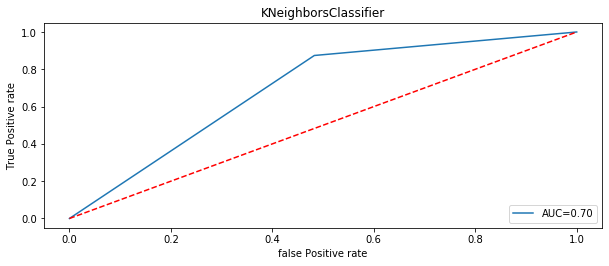

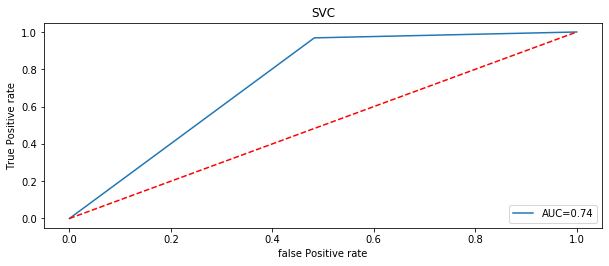

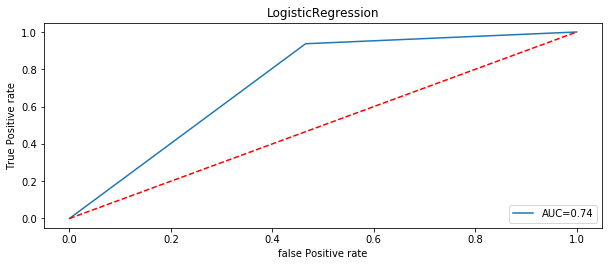

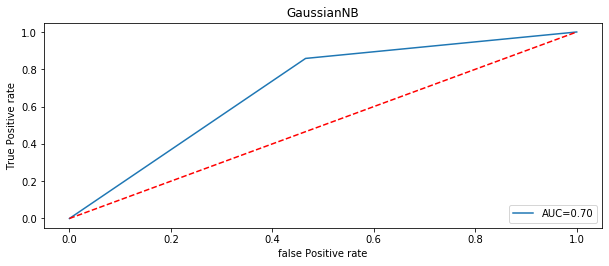

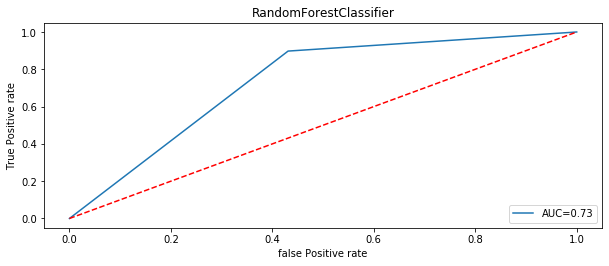

In [59]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('###############################',name,'##################################\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score= ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,X,Y,cv=10,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score= ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre),'\n')
    cm=confusion_matrix(y_test,pre)
    print('Confusion Matrix\n',cm,'\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive rate')
    plt.xlabel('false Positive rate')
    print('\n\n')

In [60]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,76.216216,71.168694,69.562856
1,SVC,82.702703,80.465362,74.287266
2,LogisticRegression,81.081081,80.795875,73.574532
3,GaussianNB,75.675676,78.516658,69.637524
4,RandomForestClassifier,79.459459,79.000529,73.330166


In [61]:
from sklearn.externals import joblib
joblib.dump(SV,'Model_Fraud_Loan_Prediction.obj')

['Model_Fraud_Loan_Prediction.obj']

In [62]:
model=joblib.load('Model_Fraud_Loan_Prediction.obj')

In [63]:
result=pd.DataFrame(model.predict(x_test))

In [64]:
result.to_csv('Loan_Statusprdictresults.csv')